In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#establishing the connection
conn = psycopg2.connect(
   database="dvf", user='ismael', password='sagrandmere', host='127.0.0.1', port= '5432'
)

# Nombre de maisons et d'appartemnts vendues par année

## Nombre de maisons vendues à l'échelle de la Réunion

/tmp/ipykernel_56754/3479291009.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("""


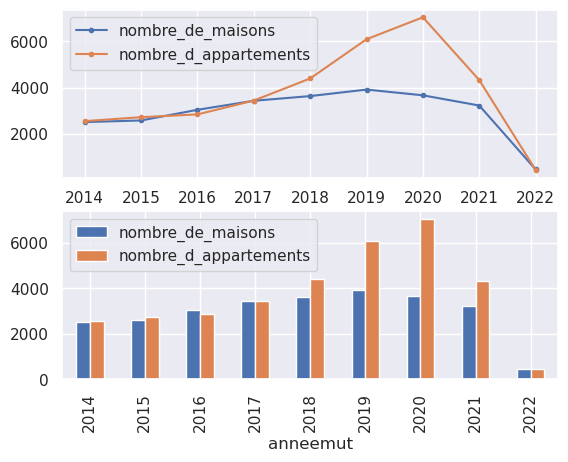

In [2]:
fig, (ax1,ax2) = plt.subplots(2)
data = pd.read_sql_query("""
SELECT 
    anneemut,
    sum(nblocmai) as nombre_de_maisons,
    sum(nblocapt) as nombre_d_appartements
FROM dvf.mutation
group by "anneemut"
order by "anneemut" ASC
""",conn)
data.plot(x = "anneemut", ax = ax1 , marker = '.')
data.plot(x = "anneemut", kind = "bar", ax = ax2)
plt.show()

## Nombre de maisons vendues à l'échelle de la commune de Sainte Marie (97418)

/tmp/ipykernel_56754/3576704001.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("""


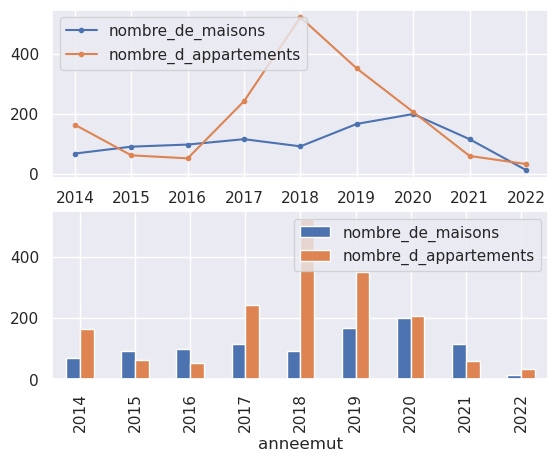

In [3]:
fig, (ax1,ax2) = plt.subplots(2)
data = pd.read_sql_query("""
SELECT 
    anneemut,
    sum(nblocmai) as nombre_de_maisons,
    sum(nblocapt) as nombre_d_appartements
FROM dvf.mutation
where '97418' = any(l_codinsee)
group by "anneemut"
order by "anneemut" ASC

""",conn)
data.plot(x = "anneemut", ax = ax1 , marker = '.')
data.plot(x = "anneemut", kind = "bar", ax = ax2)
plt.show()

## Nombre de maisons vendues à l'échelle de la commune de Sainte Denis (97411)

/tmp/ipykernel_56754/2135922500.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("""


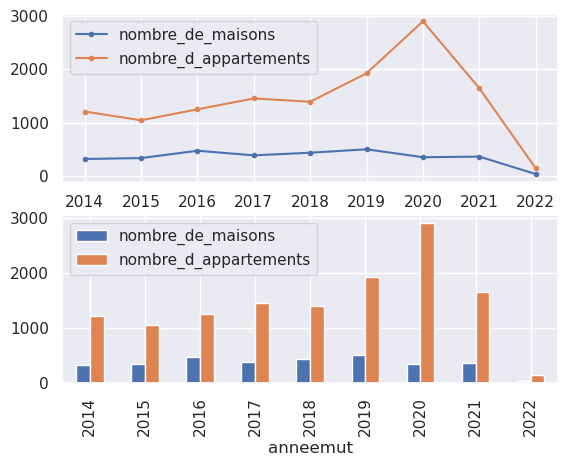

In [4]:
fig, (ax1,ax2) = plt.subplots(2)
data = pd.read_sql_query("""
SELECT 
    anneemut,
    sum(nblocmai) as nombre_de_maisons,
    sum(nblocapt) as nombre_d_appartements
FROM dvf.mutation
where '97411' = any(l_codinsee)
group by "anneemut"
order by "anneemut" ASC

""",conn)
data.plot(x = "anneemut", ax = ax1 , marker = '.')
data.plot(x = "anneemut", kind = "bar", ax = ax2)
plt.show()

## Nombre de maisons vendues sur les communes

/tmp/ipykernel_56754/3269475718.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("""


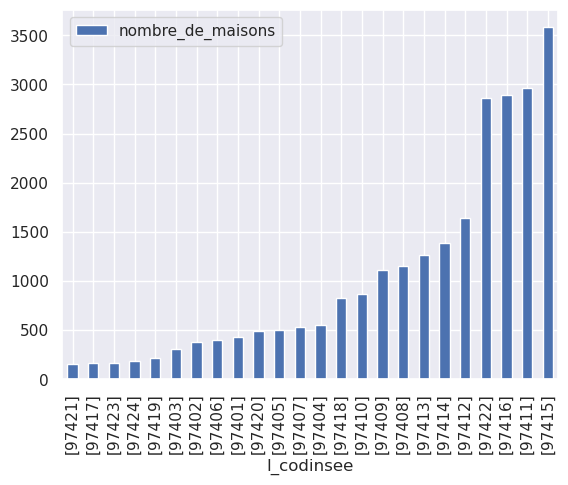

In [5]:
# Peut être utiliser à l'échelle de la commune
# Ajoutez le pourcentage
fig, ax1 = plt.subplots(1)
data = pd.read_sql_query("""
SELECT 
    l_codinsee,
    sum(nblocmai) as nombre_de_maisons
FROM dvf.mutation
where libnatmut = 'Vente'
and nbcomm = 1
group by l_codinsee
order by nombre_de_maisons
""",conn)
data.plot(x = "l_codinsee",kind = "bar",ax = ax1)
plt.show()

## Nombre d'appartements vendues selon la commune

/tmp/ipykernel_56754/207085023.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("""


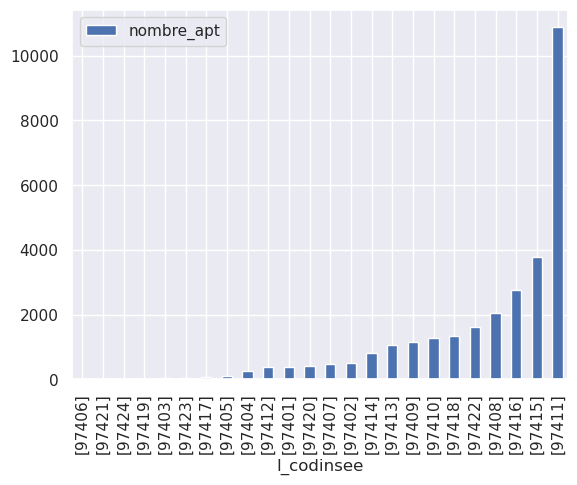

In [6]:
# Peut être utiliser à l'échelle de la commune
fig, ax1 = plt.subplots(1)
data = pd.read_sql_query("""
SELECT 
    l_codinsee,
    sum(nblocapt) as nombre_apt
FROM dvf.mutation
where libnatmut = 'Vente'
and nbcomm = 1
group by l_codinsee
order by nombre_apt
""",conn)
data.plot(x = "l_codinsee",kind = "bar",ax = ax1)
plt.show()

## Calcul du prix moyen de vente d'une maison par année

/tmp/ipykernel_56754/4025354633.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("""


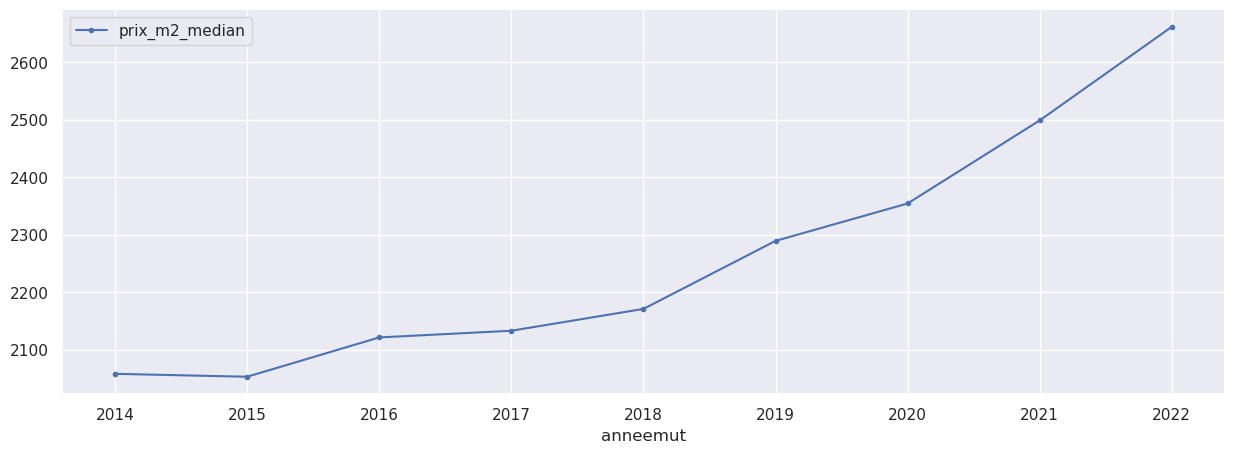

In [7]:
# Peut être utiliser à l'échelle de la commune
fig, ax1 = plt.subplots(1,figsize=(15,5))
data = pd.read_sql_query("""
SELECT anneemut, PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY valeurfonc/sbatmai) as prix_m2_median
FROM dvf.mutation
WHERE libnatmut = 'Vente'
AND nblocmai > 0
AND nblocapt = 0
GROUP BY anneemut
ORDER BY anneemut ASC
""",conn)
data.plot(x = "anneemut",kind = "line",ax = ax1,marker = ".")
plt.show()

## Calcul du prix de vente d'un appartement par année

/tmp/ipykernel_56754/306106944.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("""


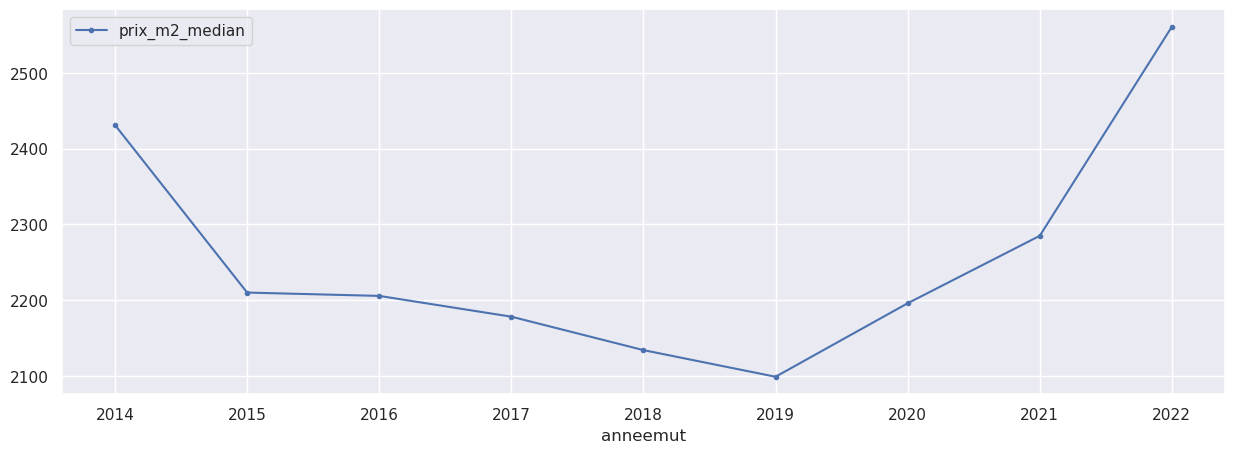

In [8]:
fig, ax1 = plt.subplots(1,figsize=(15,5))
data = pd.read_sql_query("""
SELECT anneemut, PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY valeurfonc/sbati) as prix_m2_median
FROM dvf.mutation
WHERE libnatmut = 'Vente'
AND nblocmai = 0
AND nblocapt = 1
AND sbatapt > 0
GROUP BY anneemut
ORDER BY anneemut ASC
""",conn)
data.plot(x = "anneemut",kind = "line",ax = ax1,marker = ".")
plt.show()

## Detection des anomalies

/tmp/ipykernel_56754/1752506272.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("""


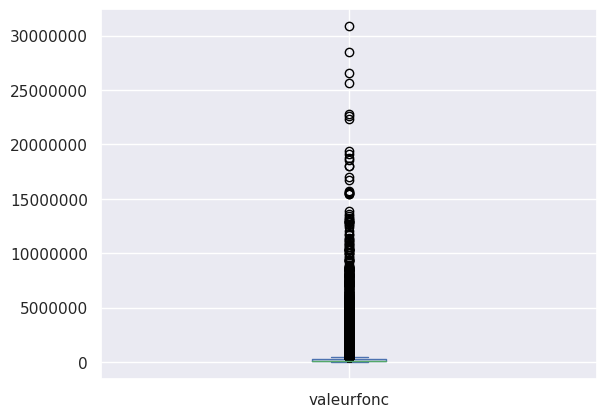

In [28]:

fig, ax1 = plt.subplots(1)
ax1.ticklabel_format(style='plain')
data = pd.read_sql_query("""
SELECT valeurfonc
FROM dvf.mutation
WHERE libnatmut = 'Vente'
""",conn).plot.box(ax = ax1)